In [1]:
import json
import numpy as np
from pyahp import parse
import matplotlib.pyplot as plt

## Load AHP Model

In [2]:
with open('./json_models/AHP_model(1).json') as json_model:
    dict_model = json.load(json_model)

dict_model

{'name': 'Sample Model',
 'method': 'approximate',
 'criteria': ['critA', 'critB', 'critC'],
 'subCriteria': {},
 'alternatives': ['altA', 'altB', 'altC'],
 'preferenceMatrices': {'criteria': [[1, 0.3333, 0.5], [3, 1, 1], [2, 1, 1]],
  'alternatives:critA': [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
  'alternatives:critB': [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
  'alternatives:critC': [[1, 1, 1], [1, 1, 1], [1, 1, 1]]}}

## AHP Solver

In [3]:
# Initialize AHP object
ahp_model = parse(dict_model)

# Calc. criteria level priorities 
criteria_pm = np.array(ahp_model.preference_matrices['criteria'])
crit_priorities = ahp_model.solver.estimate(criteria_pm)
crit_priorities = dict(zip(dict_model['criteria'], crit_priorities))
crit_priorities = dict(sorted(crit_priorities.items(), key=lambda item: item[1]))
print(crit_priorities)

# Calc. alternative level priorities 
alt_priorities = ahp_model.get_priorities()
alt_priorities = dict(zip(dict_model['alternatives'], alt_priorities))
alt_priorities = dict(sorted(alt_priorities.items(), key=lambda item: item[1]))
print(alt_priorities)

{'critA': 0.1692282130098862, 'critC': 0.3692319053289395, 'critB': 0.4615398816611744}
{'altA': 0.333, 'altB': 0.333, 'altC': 0.333}


## Display Results

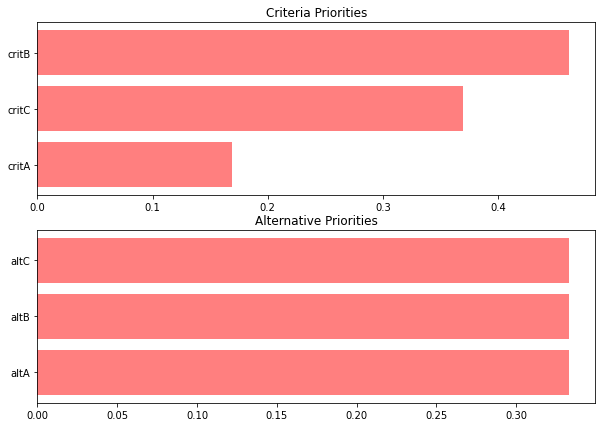

In [4]:
fig, ax = plt.subplots(2, 1)
fig.set_figwidth(10)
fig.set_figheight(7)

# Plot crit. priorities
ax[0].barh(list(crit_priorities.keys()), list(crit_priorities.values()), color='red', alpha=0.5)
ax[0].set_title('Criteria Priorities')

# Plot alt. priorities
ax[1].barh(list(alt_priorities.keys()), list(alt_priorities.values()), color='red', alpha=0.5)
ax[1].set_title('Alternative Priorities')

plt.show()